In [1]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import intervals as invs

import paths
from preprocessing import read_csv_clean

ctrl_files = paths.fr1_ivsa_ctrl
exp_files = paths.fr1_ivsa_exp

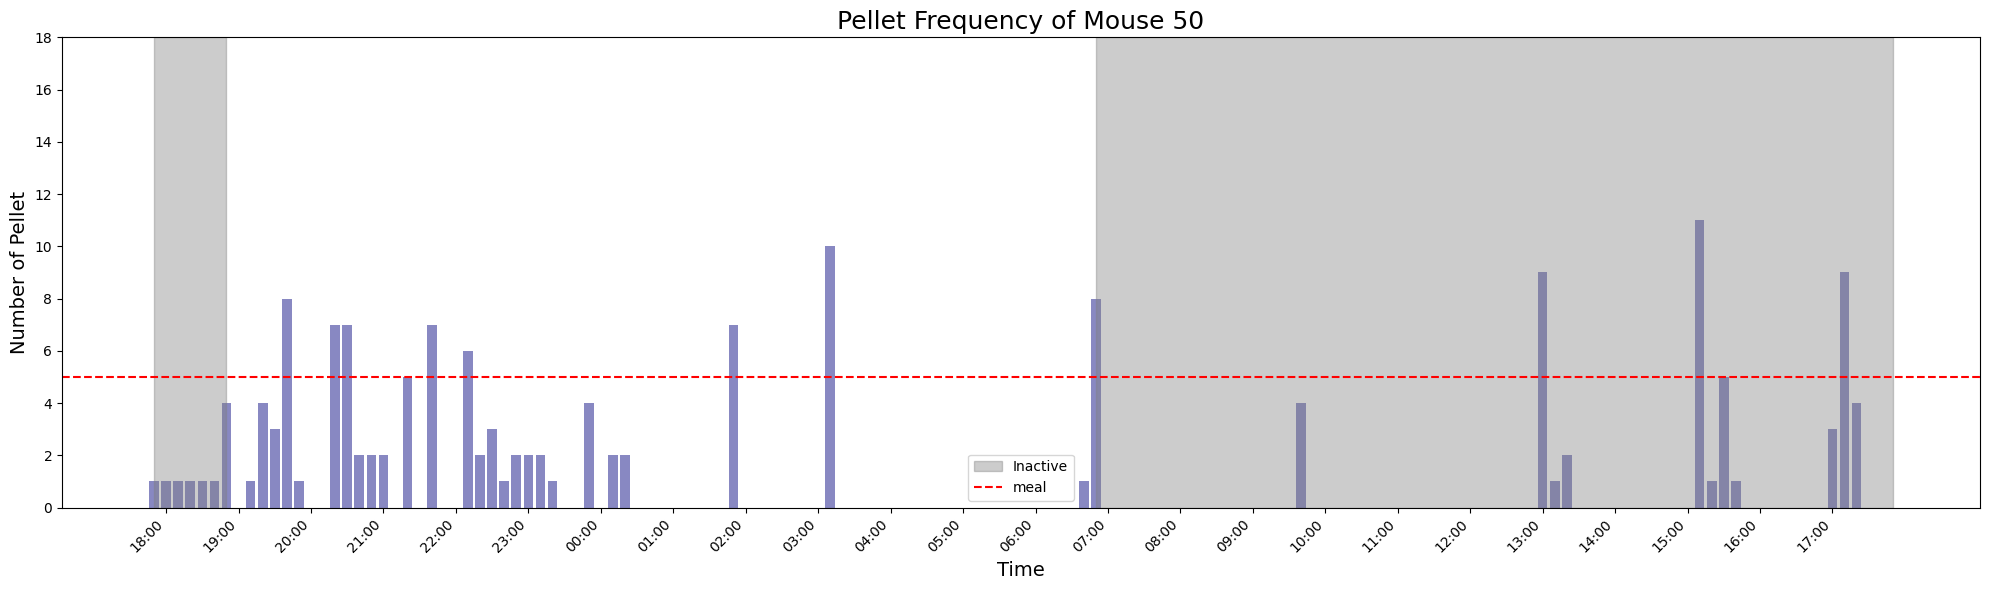

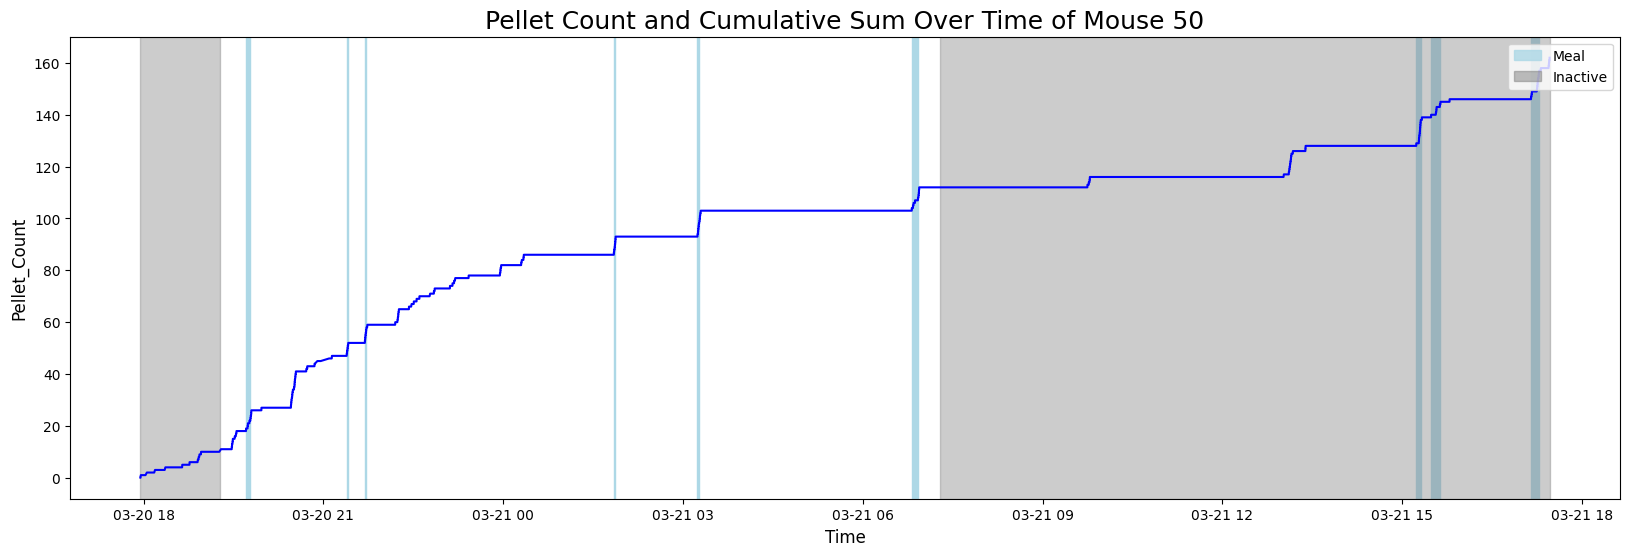

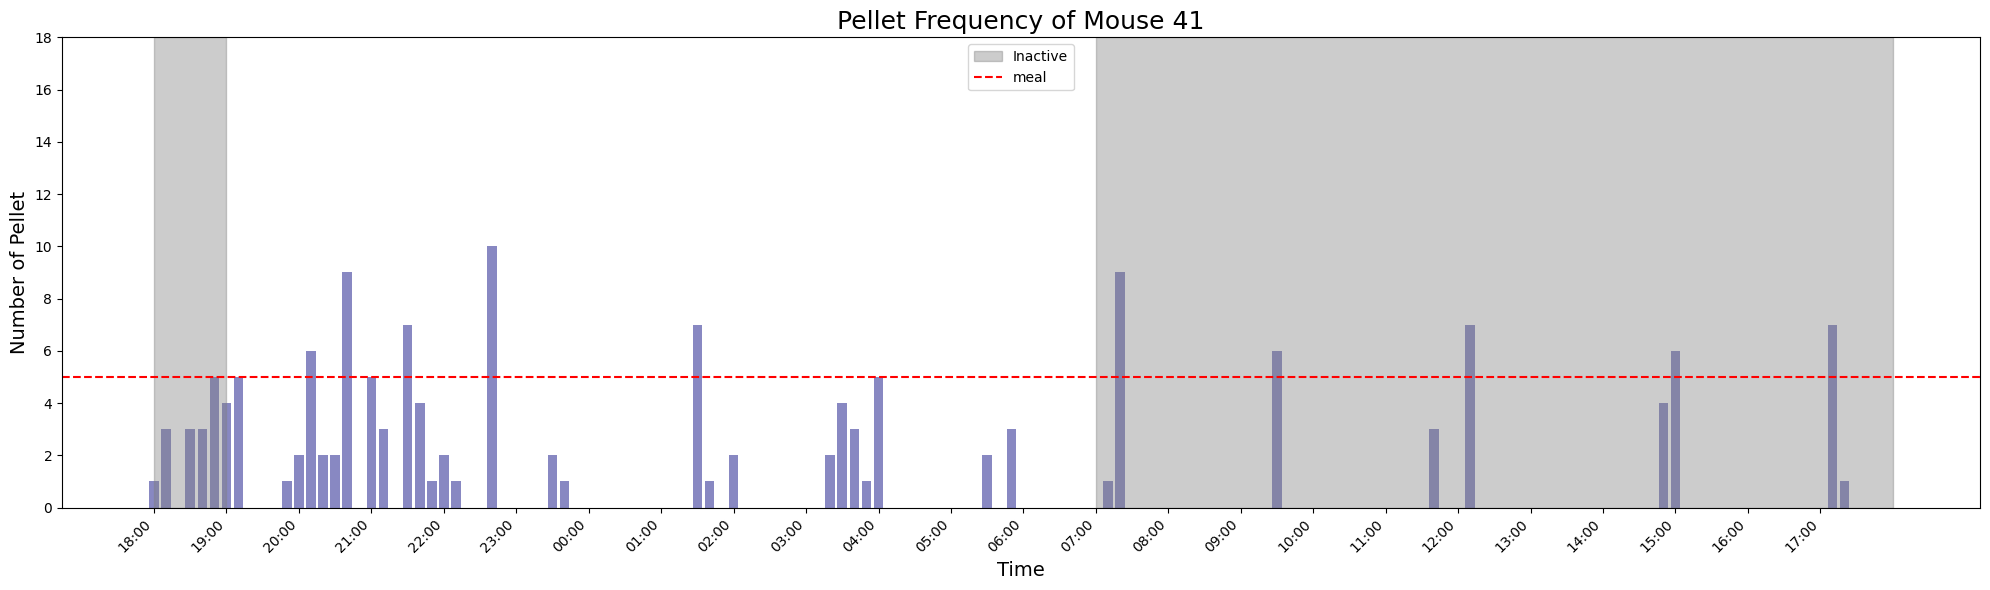

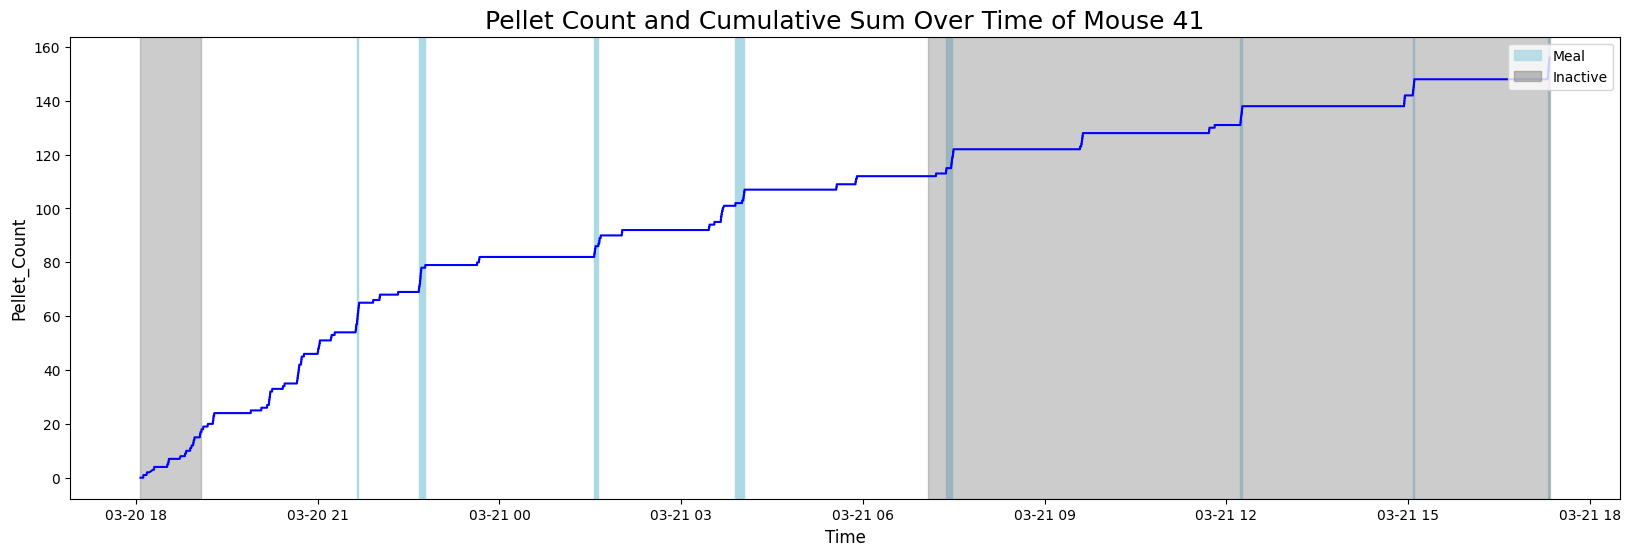

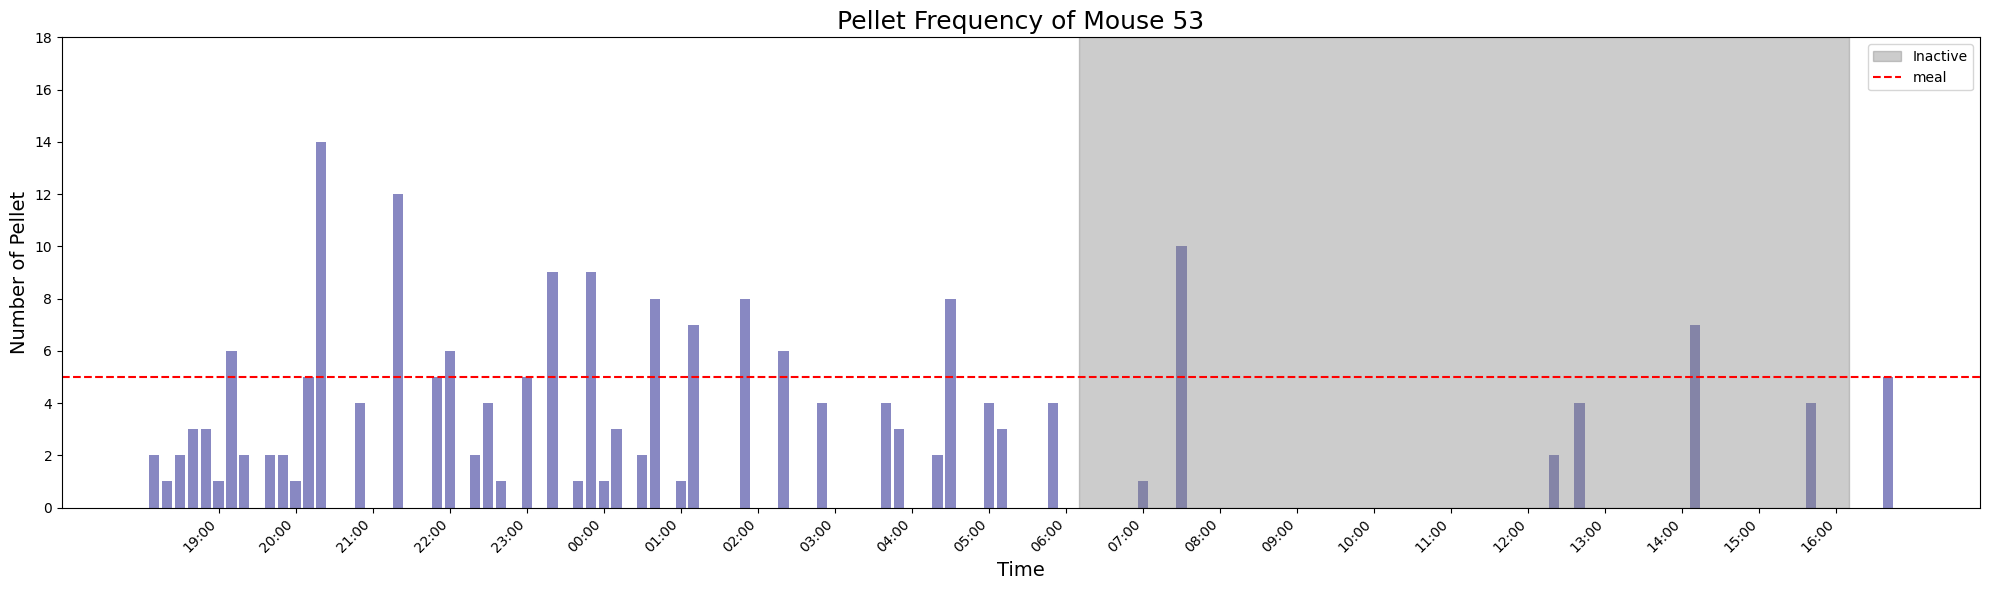

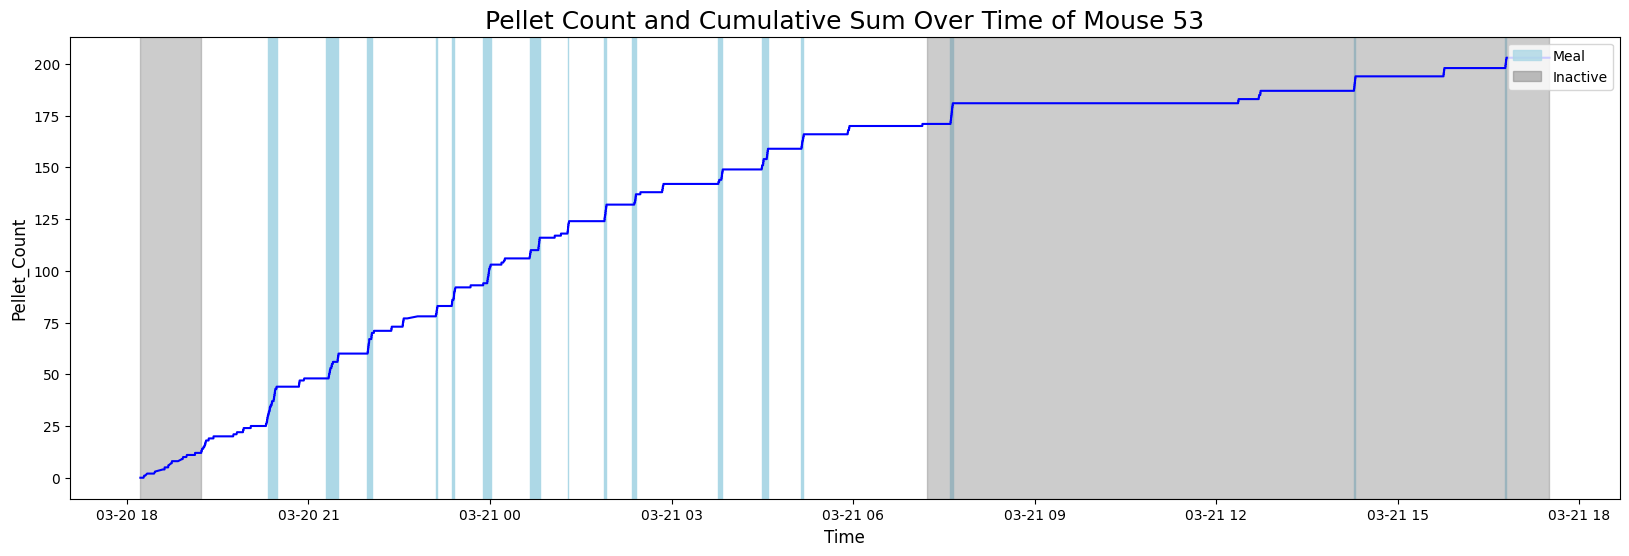

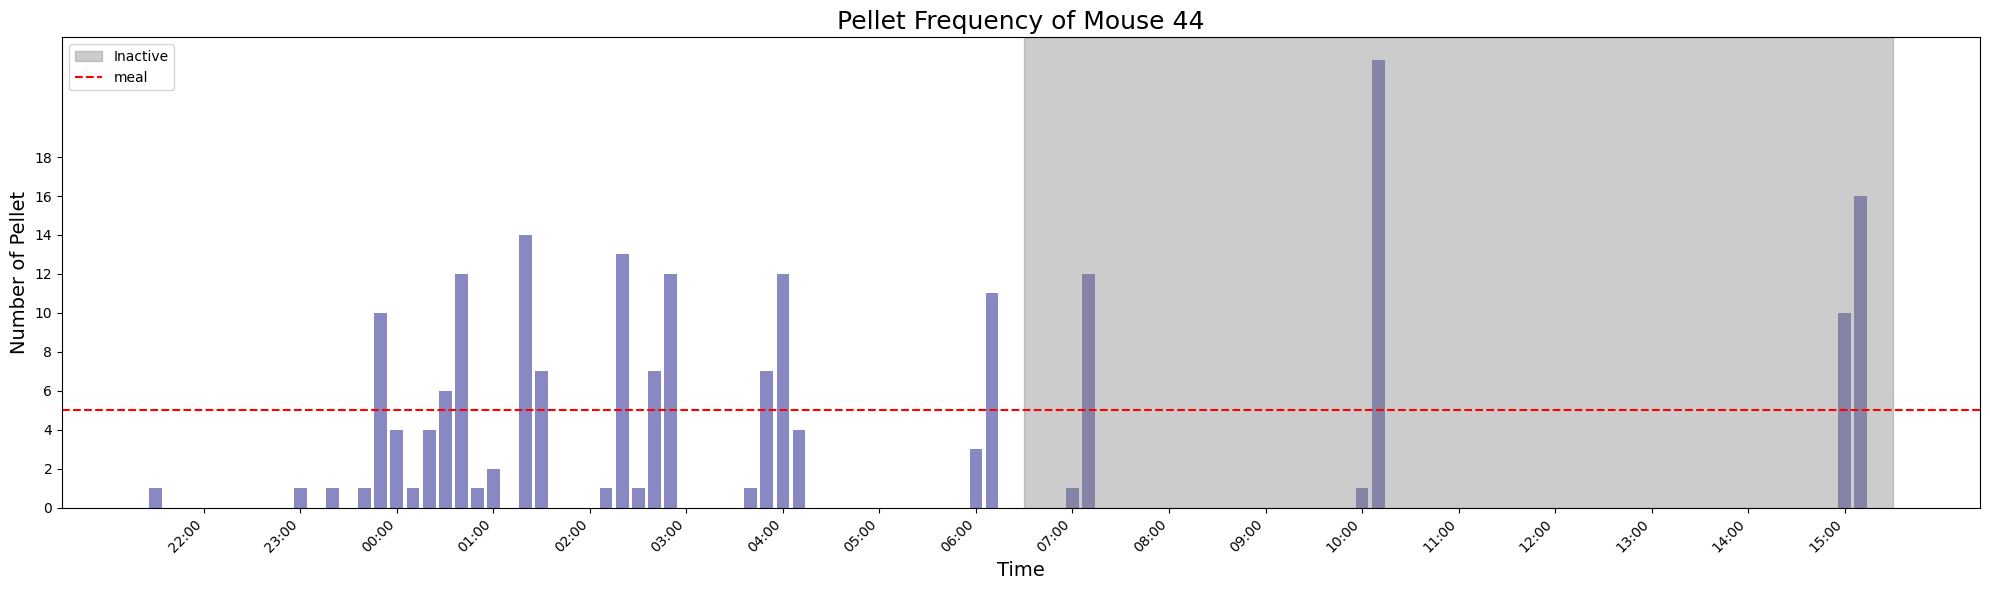

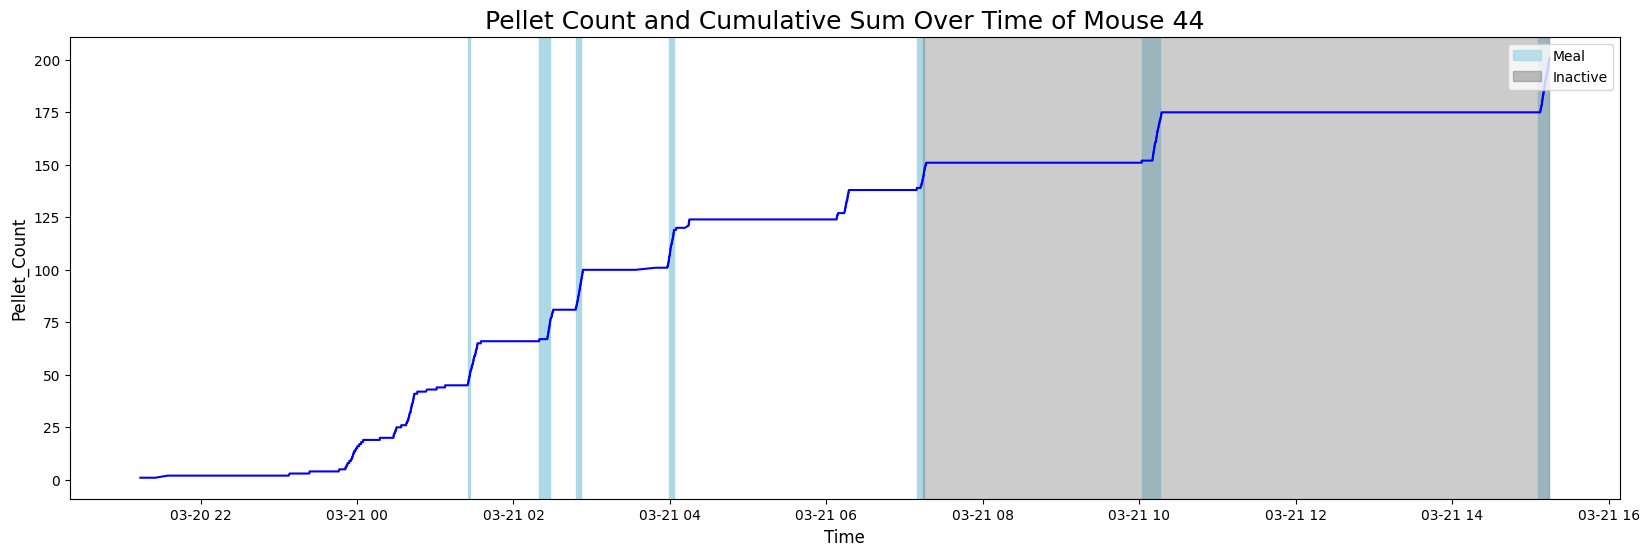

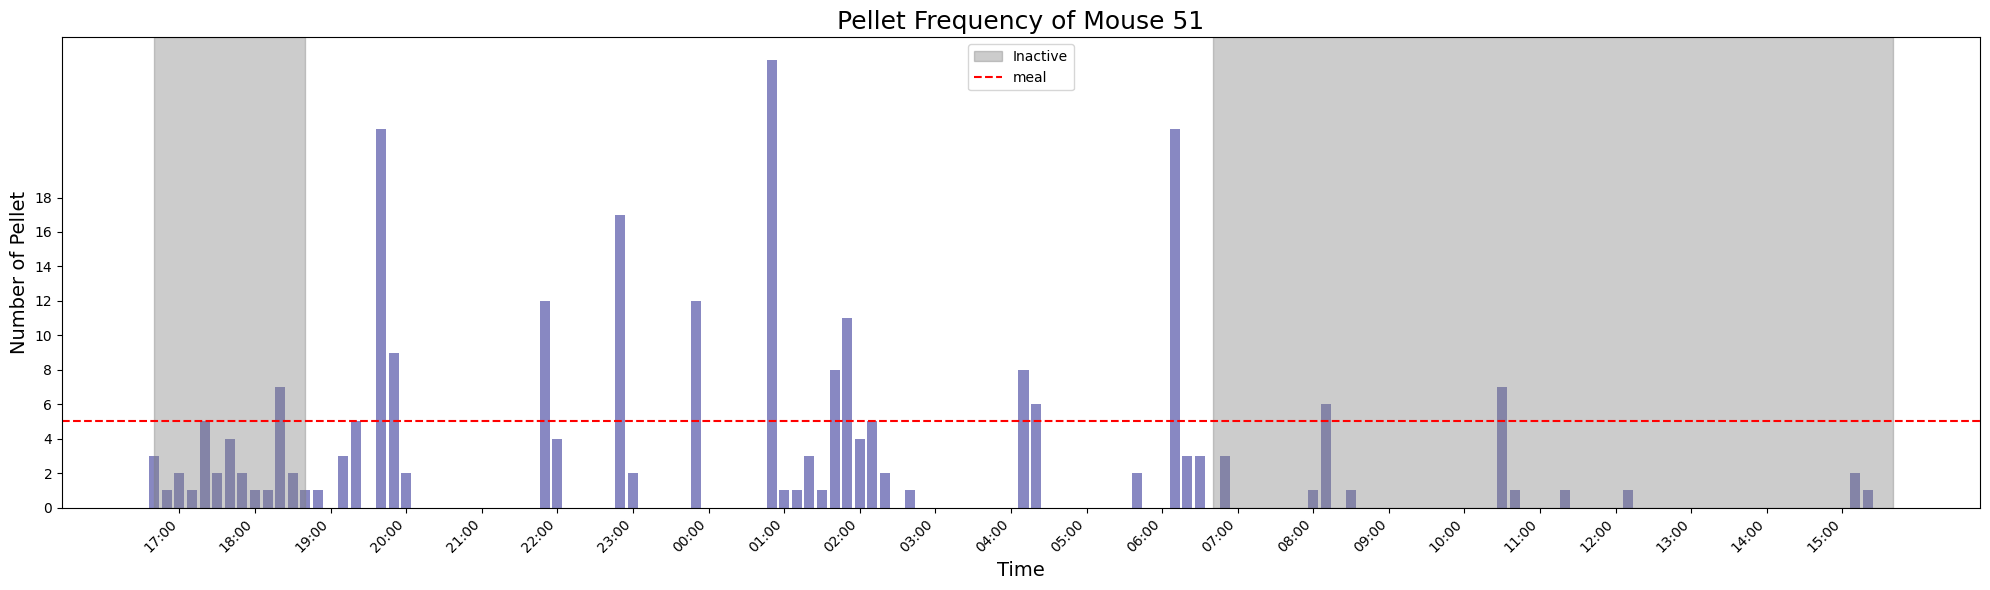

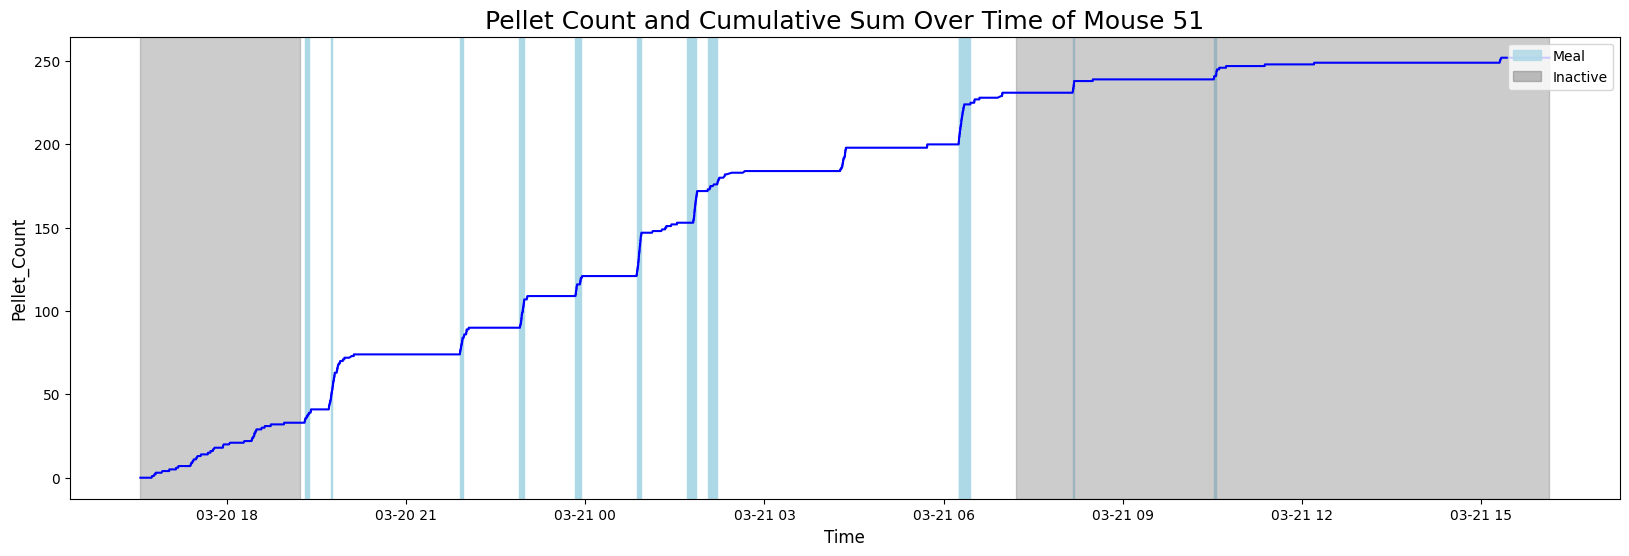

In [2]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
ctrl_meal_count = []

for path in ctrl_files:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    meal = ml.find_meals(data)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)[0]
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    ctrl_meal_count.append(avg)
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

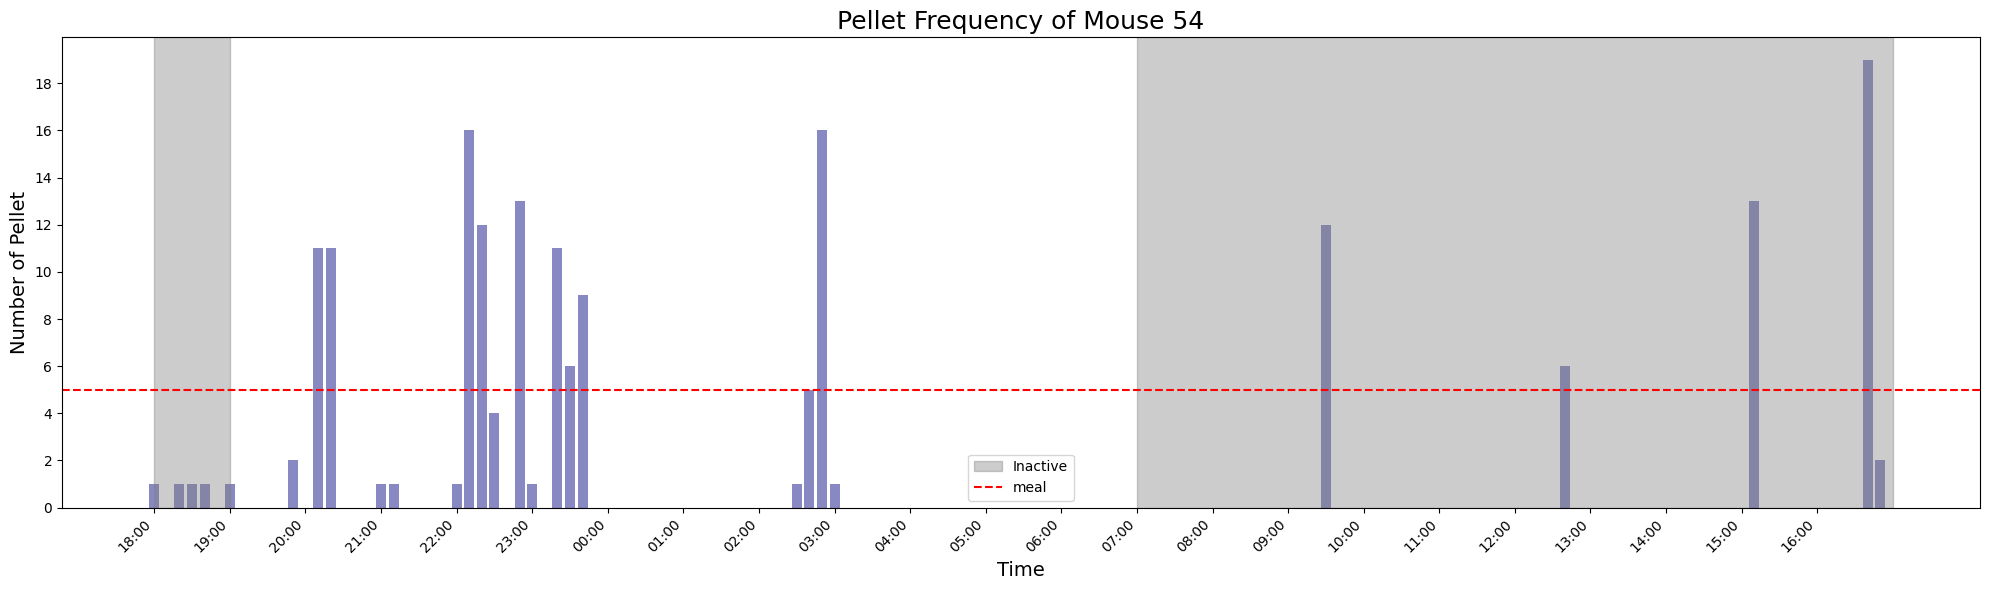

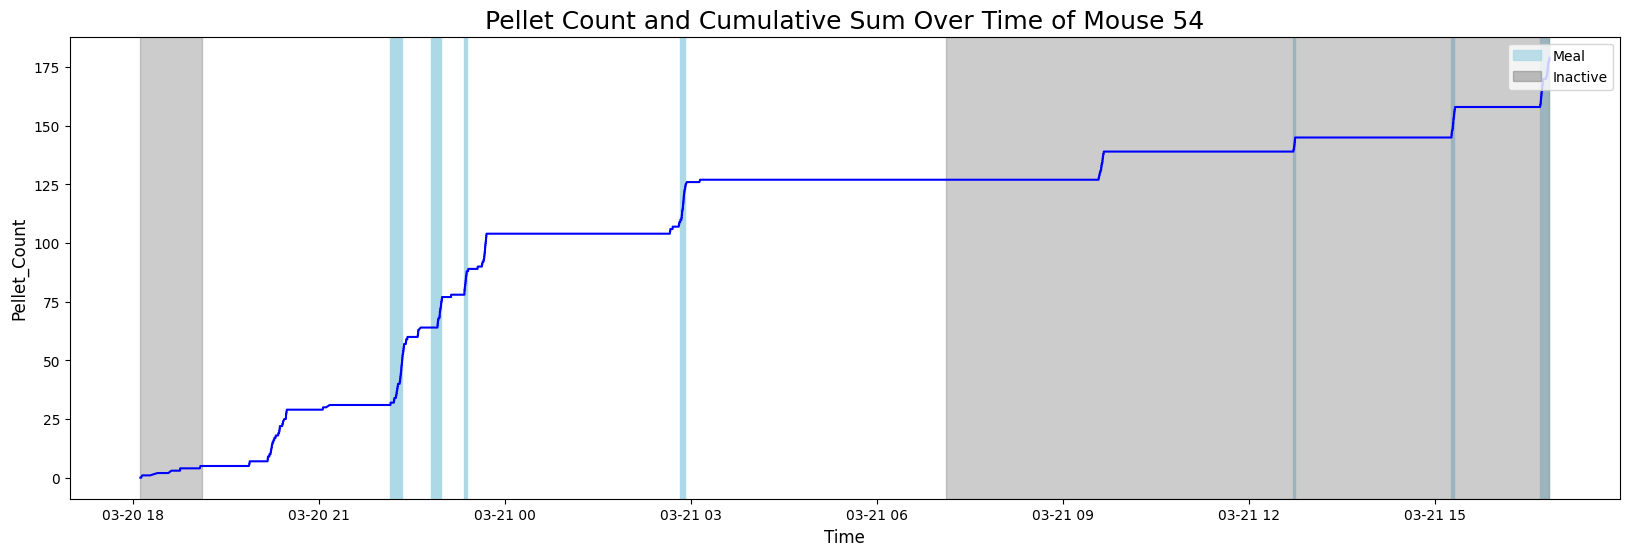

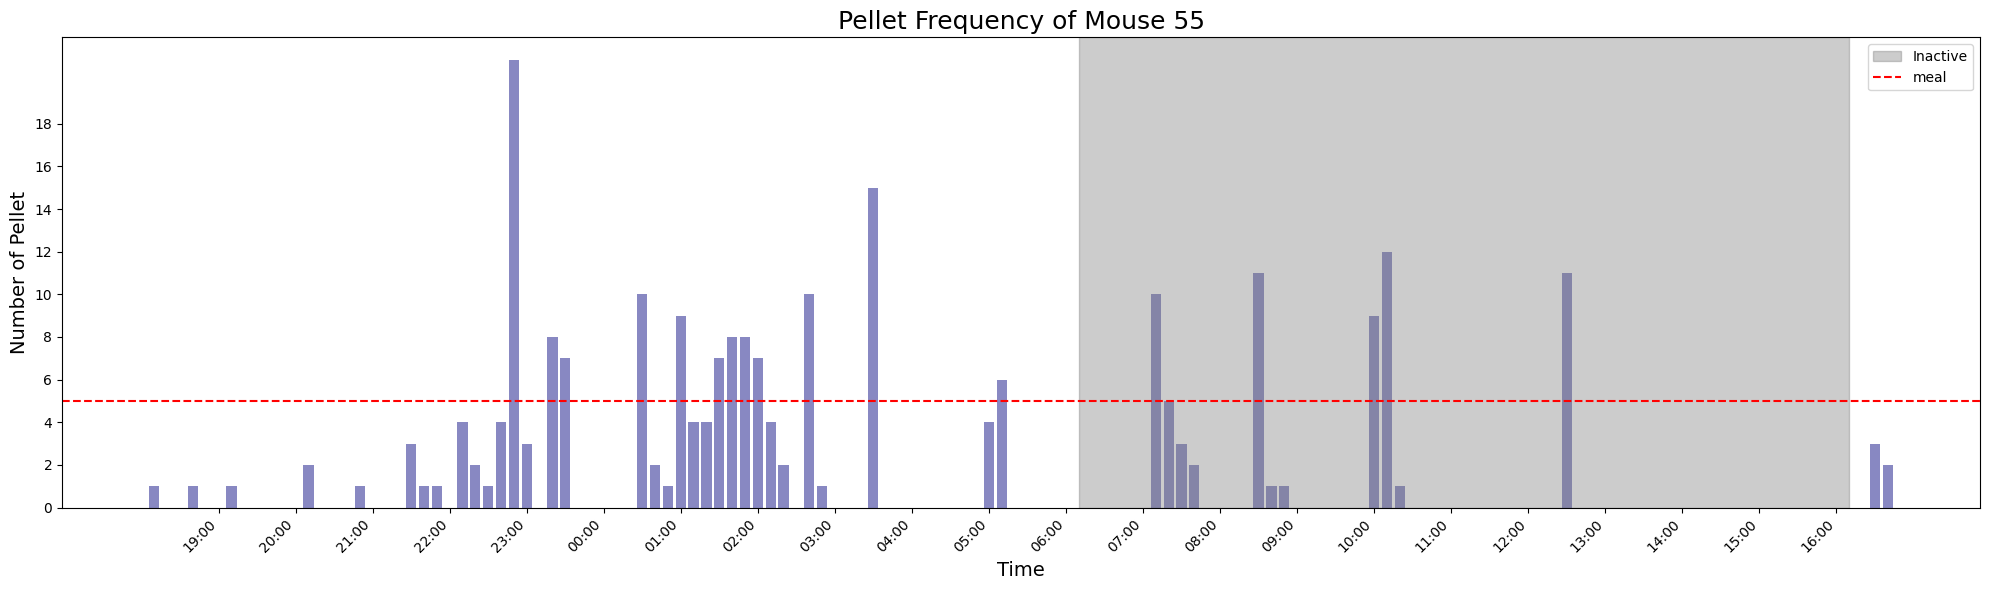

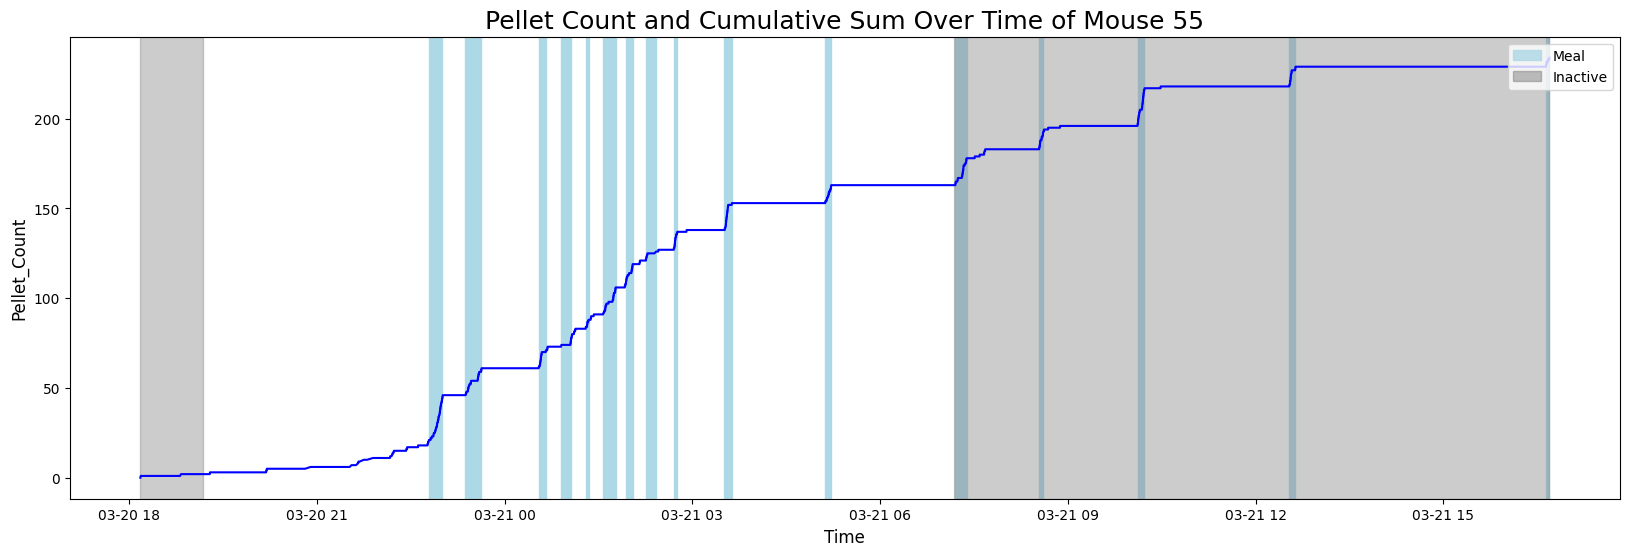

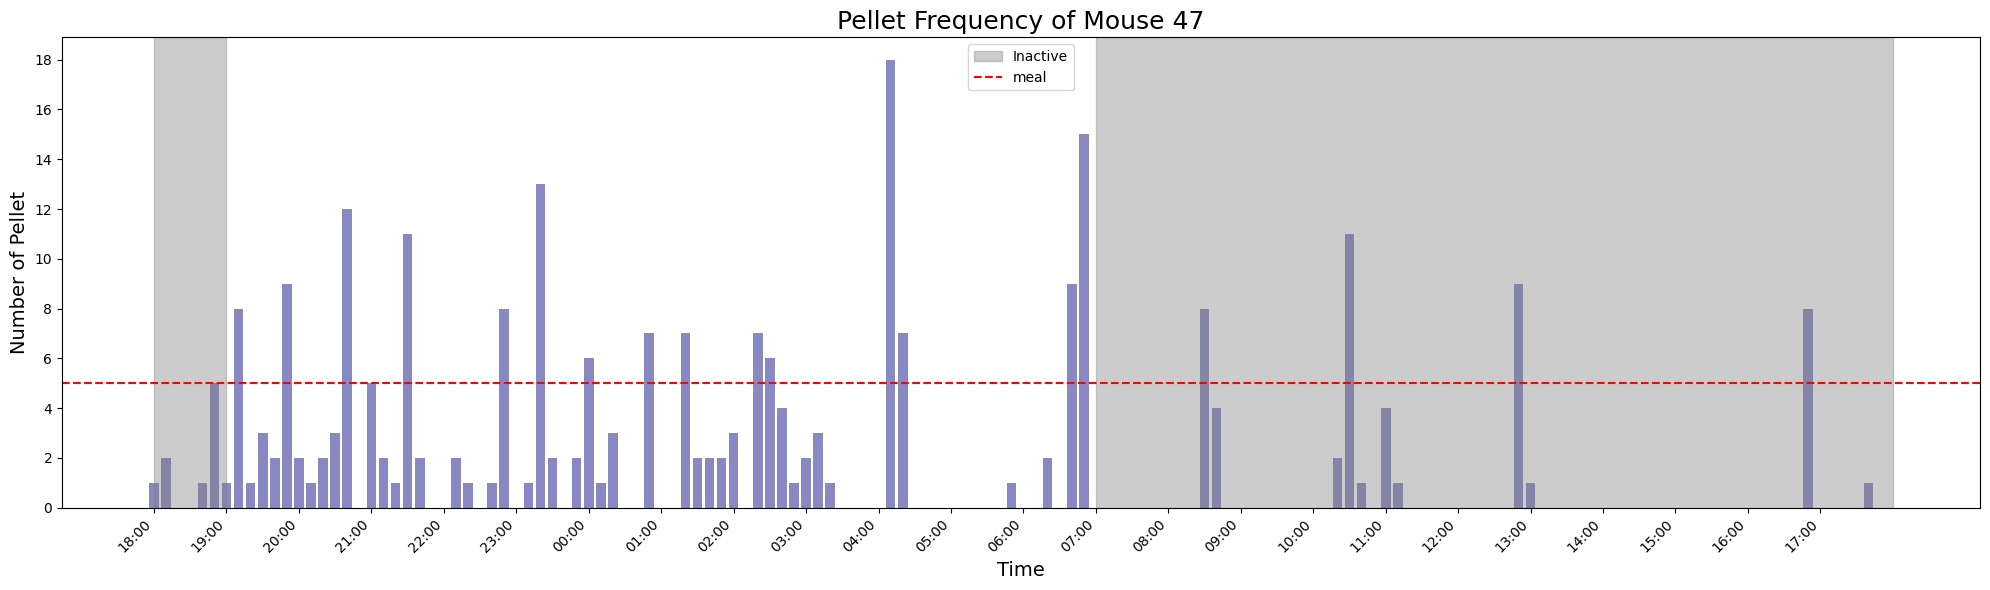

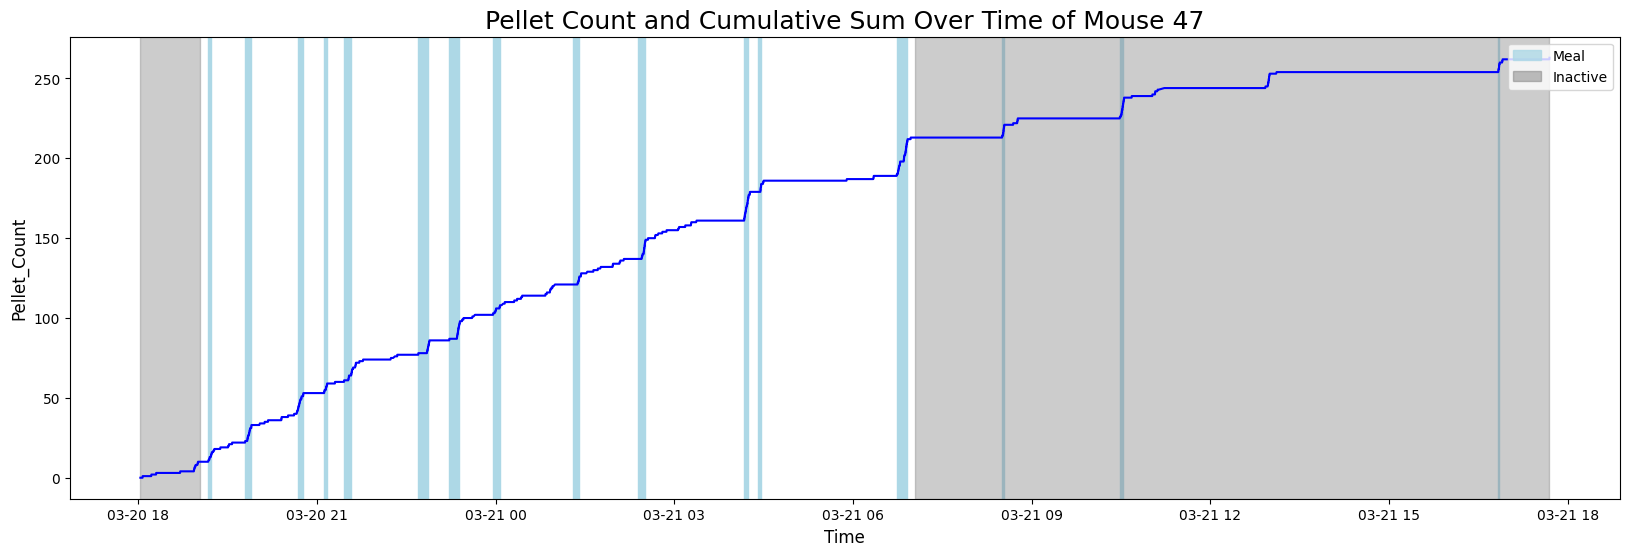

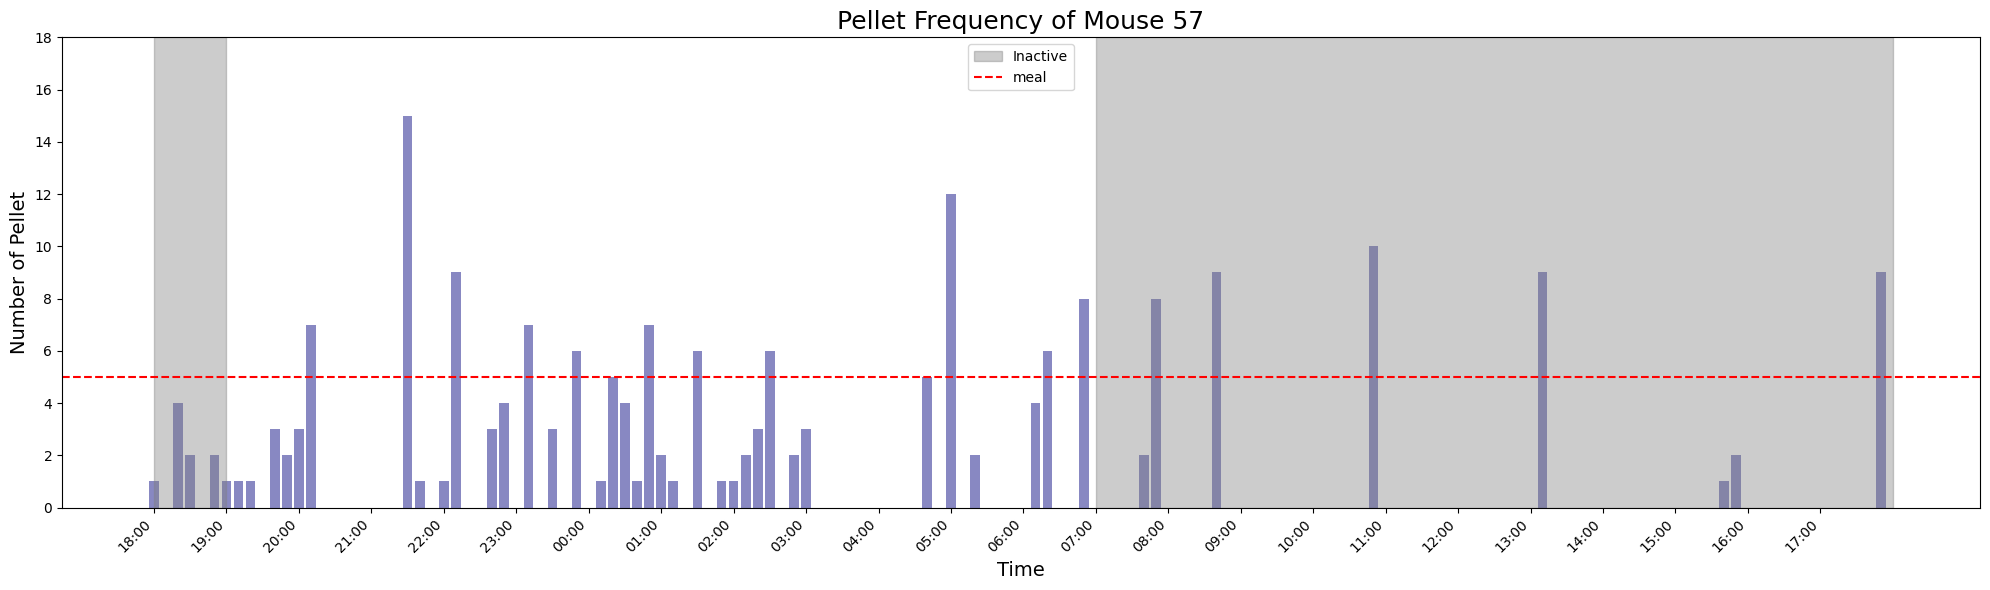

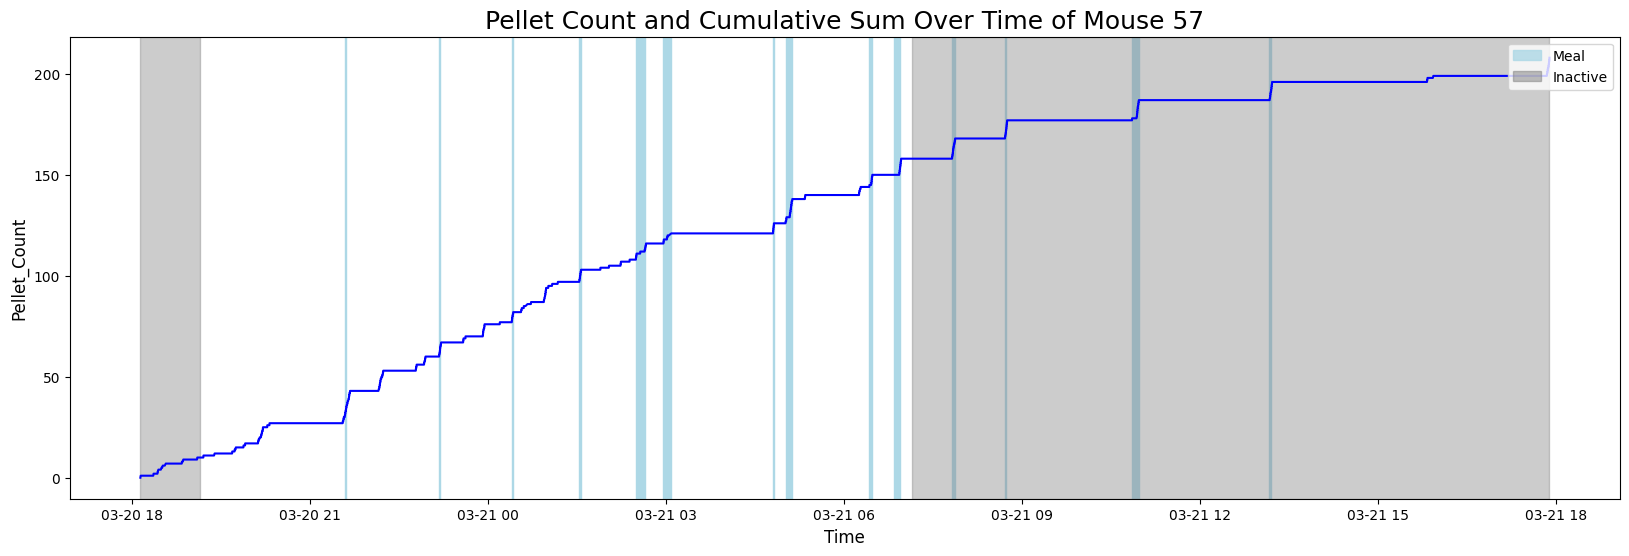

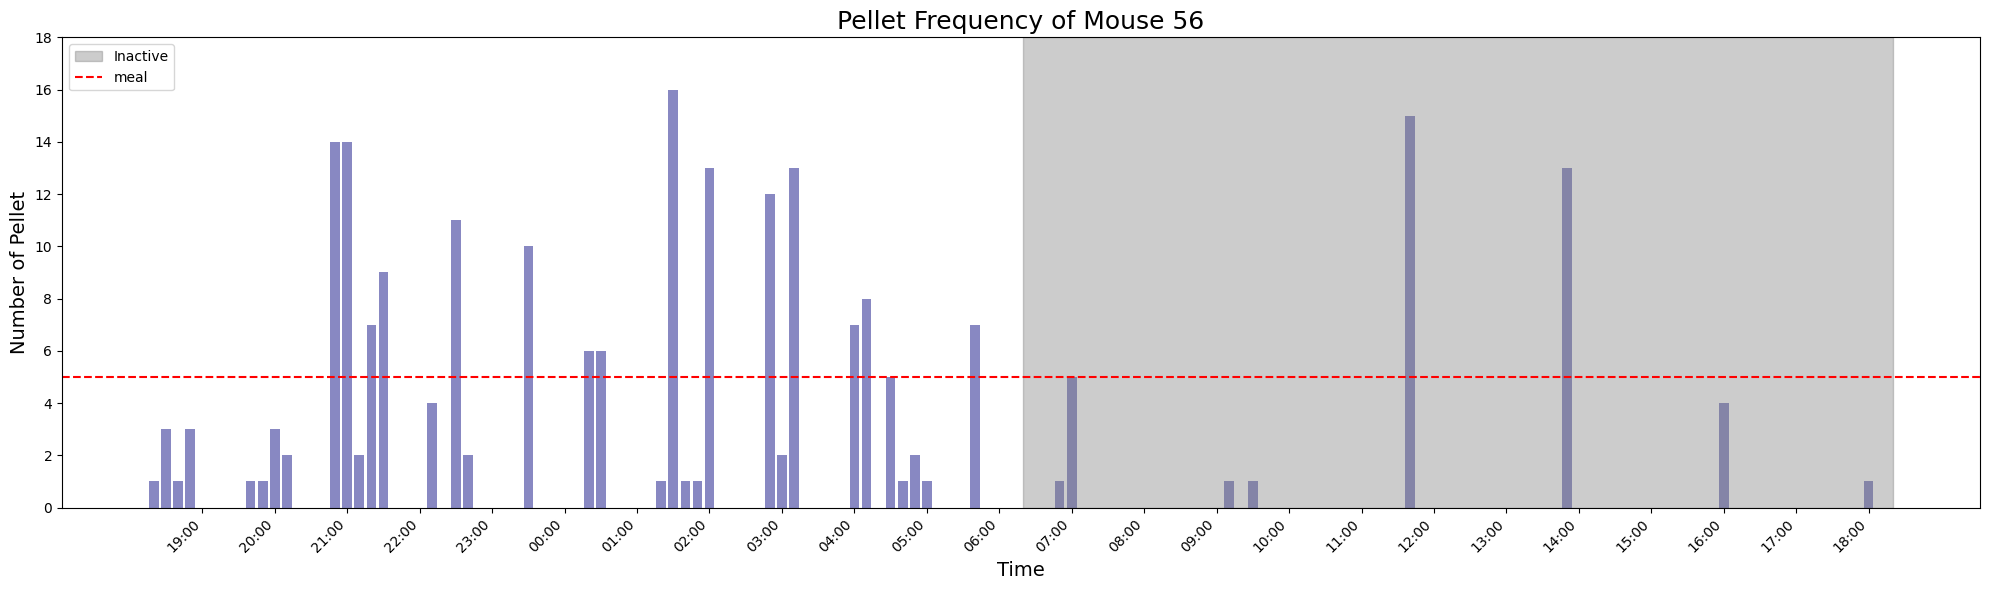

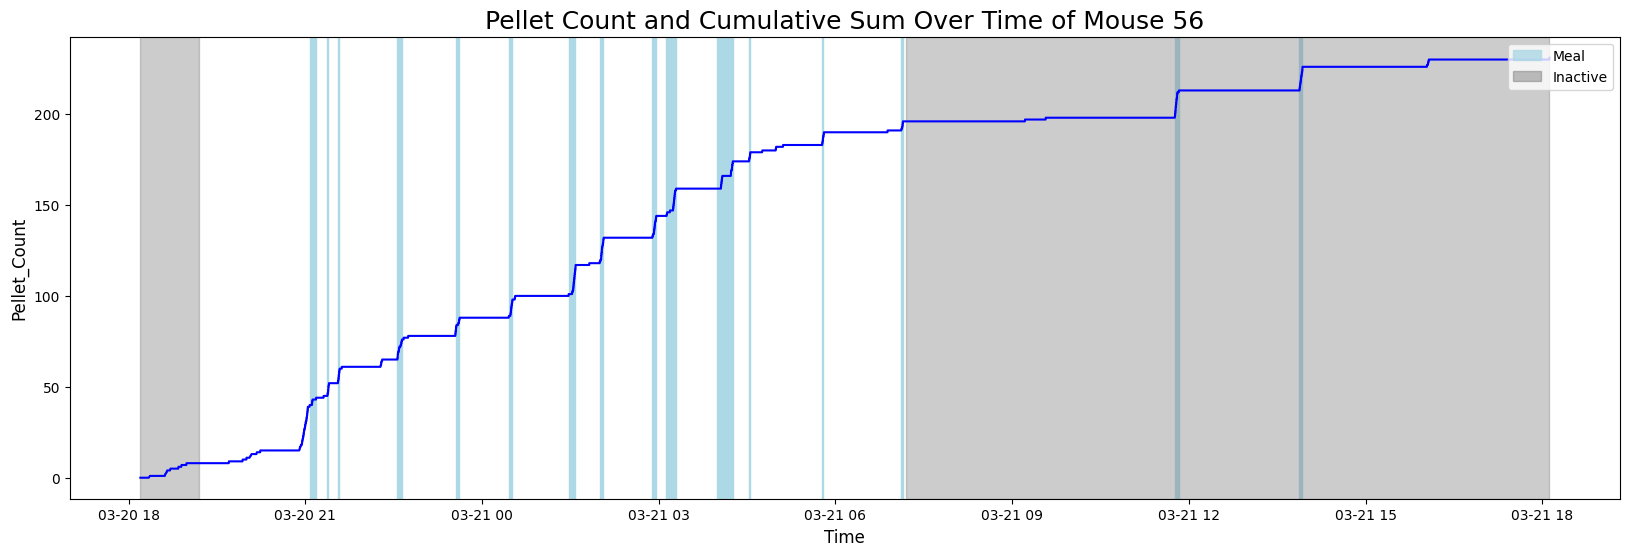

In [3]:
exp_avg_pellet = [] # pellet per hour
exp_dark_meals = [] # percentage of meals in inactive/dark phase
exp_fir_meal = []
exp_meal_count = []

for path in exp_files:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    meal = ml.find_meals(data)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)[0]
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    exp_meal_count.append(avg)
    exp_avg_pellet.append(ml.average_pellet(group))
    exp_dark_meals.append(ml.active_meal(meal))
    exp_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

In [5]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(exp_dark_meals)

#### Inactive and active meal in group

In [7]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals, test_side='greater')

P Value is  0.01849087940580723
Experiment group is significantly greater than control group


In [8]:
invs.perform_T_test(exp_dark_meals, cask_light_meals)

P Value is  0.0001427903733155448
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [9]:
invs.perform_T_test(ctrl_meal_count, exp_meal_count, test_side='greater')

P Value is  0.12676479067901605
There is no significant difference between the two groups.


#### Inactive and active meal between group

In [11]:
invs.perform_T_test(ctrl_dark_meals, exp_dark_meals, test_side='greater')

P Value is  0.3053464498882221
There is no significant difference between the two groups.


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Average Pellet

Control Size: 5
PICA Size: 5
Control Average: 9.0082
PICA Average: 9.568000000000001
Control Standard Deviation: 2.217145958208435
PICA Standard Deviation: 1.305107275284296


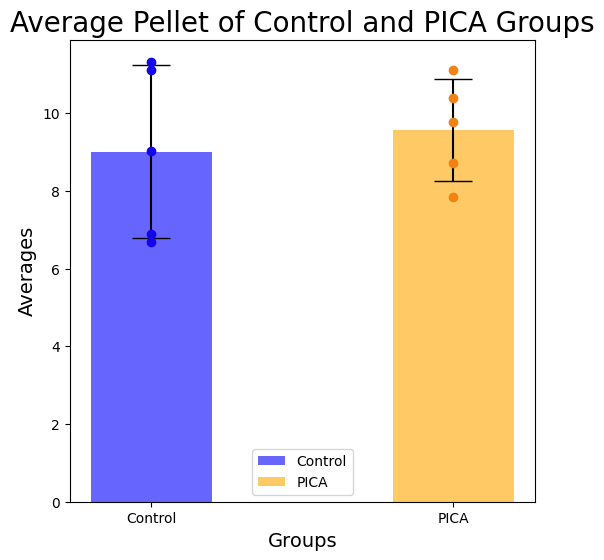

In [13]:
ml.graph_group_stats(ctrl_avg_pellet, exp_avg_pellet, stats_name='Average Pellet', exp_name='PICA')

In [14]:
invs.perform_T_test(ctrl_avg_pellet, exp_avg_pellet, test_side='greater')

P Value is  0.31981578828503743
There is no significant difference between the two groups.


#### Time needed to start the first meal

Control Size: 5
PICA Size: 5
Control Average: 172.50333333333333
PICA Average: 193.09
Control Standard Deviation: 60.30858539397373
PICA Standard Deviation: 79.87754569061042


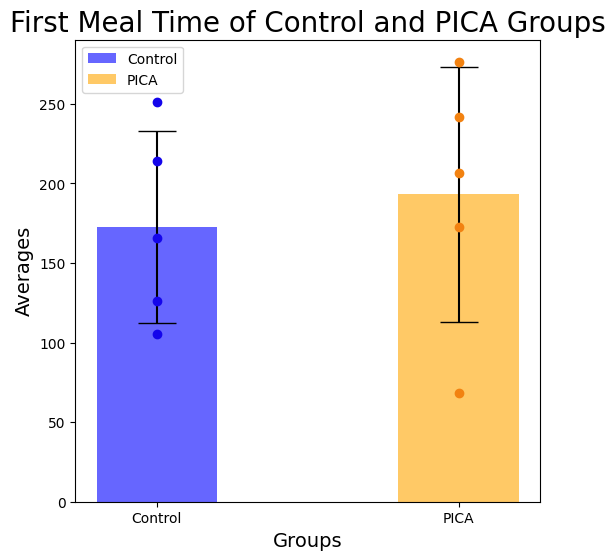

In [18]:
ml.graph_group_stats(ctrl_fir_meal, exp_fir_meal, stats_name='First Meal Time',exp_name='PICA')

In [19]:
invs.perform_T_test(ctrl_fir_meal, exp_fir_meal, test_side='greater')

P Value is  0.32890461926677517
There is no significant difference between the two groups.
